In [25]:
import numpy as np
from ase.io import read
from ase.spacegroup.symmetrize import FixSymmetry
from calorine.calculators import CPUNEP
from calorine.tools import get_force_constants, relax_structure
from pandas import DataFrame
from phonopy.units import THzToCm
from seekpath import get_explicit_k_path
import phonopy
from ase.constraints import UnitCellFilter
from ase.optimize import BFGS
from matplotlib import pyplot as plt

# Pnma

### NEP setup  

In [2]:
structure = read('HSE_DFT_Pnma_relaxed.in', format = 'aims')
calculator = CPUNEP('nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0001)

phonon = get_force_constants(structure, calculator, [2, 2, 2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)
path = get_explicit_k_path(structure_tuple)
phonon.run_band_structure([path['explicit_kpoints_rel']])
band = phonon.get_band_structure_dict()
df = DataFrame(band['frequencies'][0])
df.index = path['explicit_kpoints_linearcoord']

### DFT setup 

In [3]:
phonon_DFT = phonopy.load("BaZrS3_tilt_62/phonons/phonopy/output/phonopy.yaml")
phonon_DFT.run_band_structure([path['explicit_kpoints_rel']])
band_DFT = phonon_DFT.get_band_structure_dict()
df_DFT = DataFrame(band_DFT['frequencies'][0])
df_DFT.index = path['explicit_kpoints_linearcoord']

### Plot

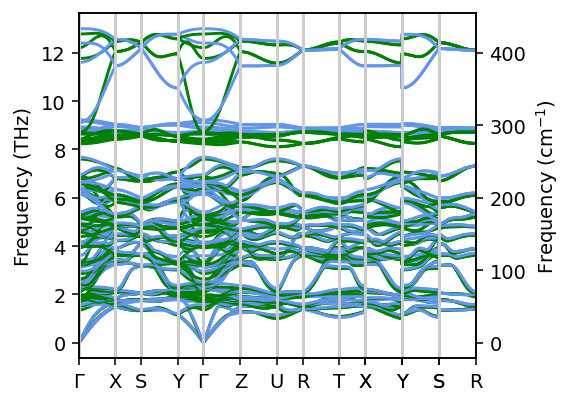

In [4]:
fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)

for col in df.columns:
    ax.plot(df_DFT.index, df_DFT[col], color='green')
    ax.plot(df.index, df[col], color='cornflowerblue')
ax.set_xlim(df.index.min(), df.index.max())

ax.set_ylabel('Frequency (THz)')
ax2 = ax.twinx()
ax2.set_ylabel('Frequency (cm$^{-1}$)')
ax2.set_ylim(THzToCm * np.array(ax.get_ylim()))

# beautify the labels on the x-axis
labels = path['explicit_kpoints_labels']
labels = ['$\Gamma$' if m == 'GAMMA' else m for m in labels]
labels = [m.replace('_', '$_') + '$' if '_' in m else m for m in labels]
df_path = DataFrame(dict(labels=labels,
                         positions=path['explicit_kpoints_linearcoord']))
df_path.drop(df_path.index[df_path.labels == ''], axis=0, inplace=True)
ax.set_xticks(df_path.positions)
ax.set_xticklabels(df_path.labels)
for xp in df_path.positions:
    ax.axvline(xp, color='0.8')

plt.tight_layout()

# I4/mcm

In [36]:
structure = read('HSE_DFT_I4_mcm_relaxed.in', format = 'aims')
calculator = CPUNEP('nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0001)

phonon = get_force_constants(structure, calculator, [2,2,2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)
path = get_explicit_k_path(structure_tuple)
phonon.run_band_structure([path['explicit_kpoints_rel']])
band = phonon.get_band_structure_dict()
df = DataFrame(band['frequencies'][0])
df.index = path['explicit_kpoints_linearcoord']

In [37]:
phonon_DFT = phonopy.load("BaZrS3_tilt_140/phonons/phonopy/output/phonopy.yaml")
phonon_DFT.run_band_structure([path['explicit_kpoints_rel']])
band_DFT = phonon_DFT.get_band_structure_dict()
df_DFT = DataFrame(band_DFT['frequencies'][0])
df_DFT.index = path['explicit_kpoints_linearcoord']

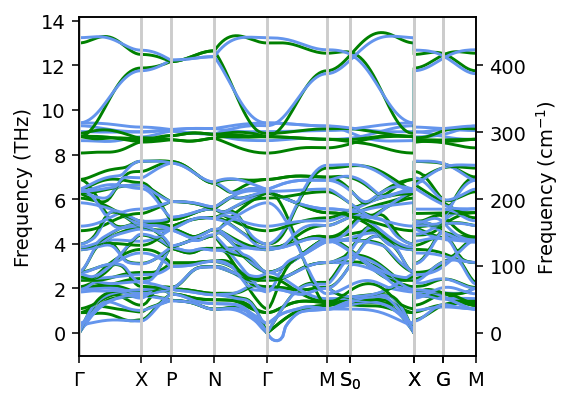

In [38]:
fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)

for col in df.columns:
    ax.plot(df_DFT.index, df_DFT[col], color='green')
    ax.plot(df.index, df[col], color='cornflowerblue')
ax.set_xlim(df.index.min(), df.index.max())

ax.set_ylabel('Frequency (THz)')
ax2 = ax.twinx()
ax2.set_ylabel('Frequency (cm$^{-1}$)')
ax2.set_ylim(THzToCm * np.array(ax.get_ylim()))

# beautify the labels on the x-axis
labels = path['explicit_kpoints_labels']
labels = ['$\Gamma$' if m == 'GAMMA' else m for m in labels]
labels = [m.replace('_', '$_') + '$' if '_' in m else m for m in labels]
df_path = DataFrame(dict(labels=labels,
                         positions=path['explicit_kpoints_linearcoord']))
df_path.drop(df_path.index[df_path.labels == ''], axis=0, inplace=True)
ax.set_xticks(df_path.positions)
ax.set_xticklabels(df_path.labels)
for xp in df_path.positions:
    ax.axvline(xp, color='0.8')

plt.tight_layout()

# Pm-3m 

In [3]:
structure = read('BaZrS3_tilt_221/phonons/geometry.in', format = 'aims')
calculator = CPUNEP('nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0000001)

phonon = get_force_constants(structure, calculator, [8,8,8])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)
path = get_explicit_k_path(structure_tuple)
phonon.run_band_structure([path['explicit_kpoints_rel']])
band = phonon.get_band_structure_dict()
df = DataFrame(band['frequencies'][0])
df.index = path['explicit_kpoints_linearcoord']

In [4]:
phonon_DFT = phonopy.load("BaZrS3_tilt_221/phonons/phonopy/output/phonopy.yaml")
phonon_DFT.run_band_structure([path['explicit_kpoints_rel']])
band_DFT = phonon_DFT.get_band_structure_dict()
df_DFT = DataFrame(band_DFT['frequencies'][0])
df_DFT.index = path['explicit_kpoints_linearcoord']

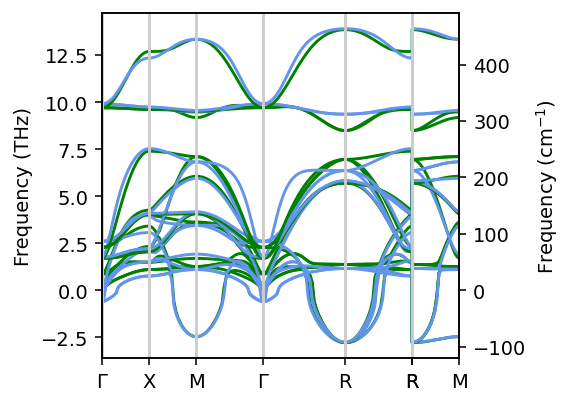

In [5]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)

for col in df.columns:
    ax.plot(df_DFT.index, df_DFT[col], color='green')
    ax.plot(df.index, df[col], color='cornflowerblue')
ax.set_xlim(df.index.min(), df.index.max())

ax.set_ylabel('Frequency (THz)')
ax2 = ax.twinx()
ax2.set_ylabel('Frequency (cm$^{-1}$)')
ax2.set_ylim(THzToCm * np.array(ax.get_ylim()))

# beautify the labels on the x-axis
labels = path['explicit_kpoints_labels']
labels = ['$\Gamma$' if m == 'GAMMA' else m for m in labels]
labels = [m.replace('_', '$_') + '$' if '_' in m else m for m in labels]
df_path = DataFrame(dict(labels=labels,
                         positions=path['explicit_kpoints_linearcoord']))
df_path.drop(df_path.index[df_path.labels == ''], axis=0, inplace=True)
ax.set_xticks(df_path.positions)
ax.set_xticklabels(df_path.labels)
for xp in df_path.positions:
    ax.axvline(xp, color='0.8')

plt.tight_layout()

In [41]:
path = "GXMGRM"
special_points = dict(
    G = [0,0,0],
    M = [1/2, 1/2, 0],
    R = [1/2, 1/2, 1/2],
    X = [0, 1/2, 0]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

In [44]:
structure = read('BaZrS3_tilt_221/phonons/geometry.in', format = 'aims')
calculator = CPUNEP('nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure, symprec = 0.000000001))

ucf = UnitCellFilter(structure)
dyn = BFGS(ucf, logfile='log.out', trajectory='test.traj')
dyn.run(fmax=0.0000001, steps=100)

phonon = get_force_constants(structure, calculator, [2,2,2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)
phonon.run_band_structure(path_list)
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

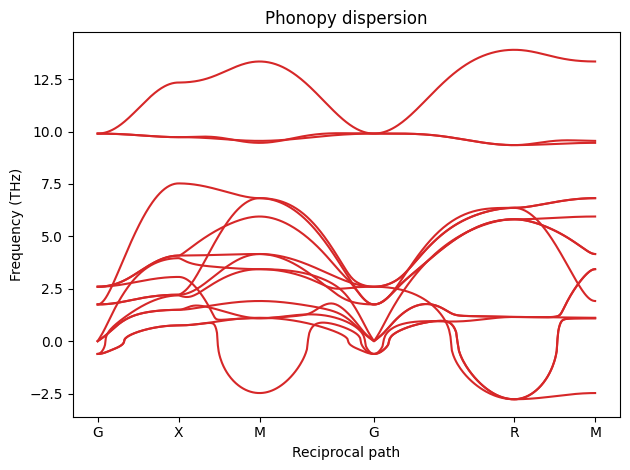

In [45]:
fig_phonopy_dispersion, ax = plt.subplots()
ax.set_title('Phonopy dispersion')
ax.set_xlabel('Reciprocal path')
ax.set_ylabel('Frequency (THz)')

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
ax.set_xticks(xticks)
ax.set_xticklabels(list(path))

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:red')

fig_phonopy_dispersion.tight_layout()